### Choose a dataset to Visulaize
* Import needed libraries 
* Load your dataset

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
supermarket_data = pd.read_csv('supermarket_sales - Sheet1.csv')
supermarket_data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


Attribute information
- Invoice id: Computer generated sales slip invoice identification number
- Branch: Branch of supercenter (3 branches are available identified by A, B and C).
- City: Location of supercenters
- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
- Gender: Gender type of customer
- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in $
- Quantity: Number of products purchased by customer
- Tax: 5% tax fee for customer buying
- Total: Total price including tax
- Date: Date of purchase (Record available from January 2019 to March 2019)
- Time: Purchase time (10am to 9pm)
- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
- COGS: Cost of goods sold
- Gross margin percentage: Gross margin percentage
- Gross income: Gross income
- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Univariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

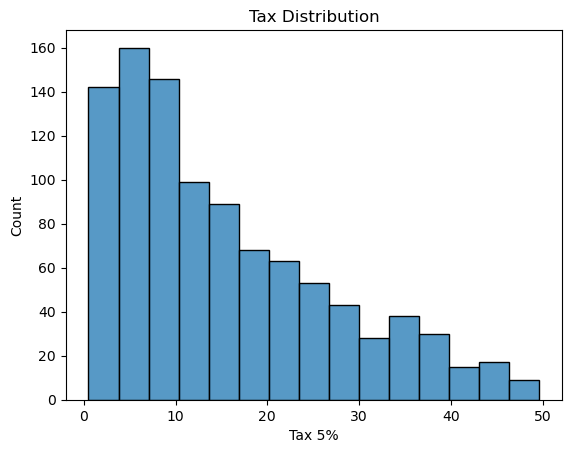

In [71]:
sns.histplot(supermarket_data['Tax 5%'])
plt.title('Tax Distribution');

#### Write your insghts here

- Most tax values are between 0 to 10.
- The rank has right skewness.

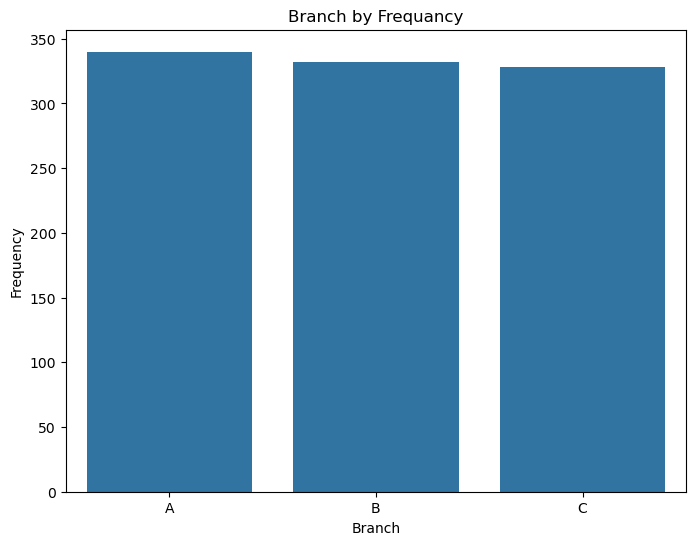

In [81]:
Branches = supermarket_data['Branch'].value_counts().sort_values(ascending=False).reset_index()
Branches.rename(columns={'index':'Branch', 'Branch':'Frequency'}, inplace=True)
plt.figure(figsize=(8,6))
sns.barplot(data= Branches, x='Branch', y='Frequency',color= sns.color_palette()[0])
plt.title('Branch by Frequancy');

#### Write your insghts here

- Branch A have the most Frequent appearnce in the dataset.
- All the branchs in the data almost have the value of frequency.

This graph may help the business owner to know which branch is most frequantly visted or if there is any problem that need to be fixed.

### Bivariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

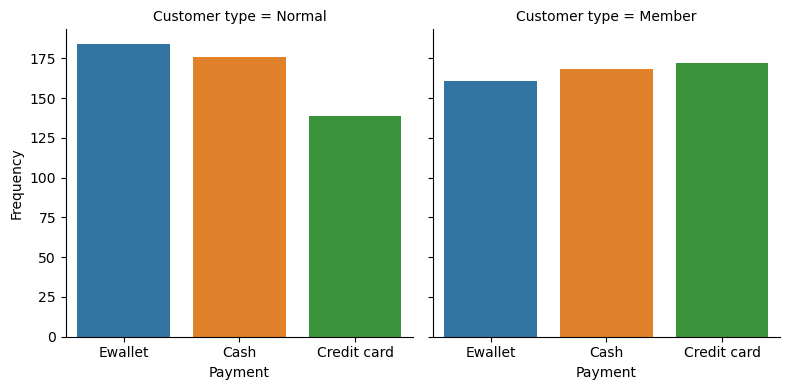

In [113]:
customerByPayment= supermarket_data.value_counts(['Customer type','Payment']).reset_index()
customerByPayment.rename(columns={0:'Frequency'}, inplace=True)
sns.catplot(data=customerByPayment, x="Payment", y="Frequency", col="Customer type", kind="bar", height=4);

#### Write your insghts here

- Member customers usualy pays with there credit card whereas the Normal customers pay more with there EWallet.
- Cash payment is almost the same for both type of custmores.

This graph may help the business owner to know which payment method is prefferd for the customer and make it easier and accessable for them.

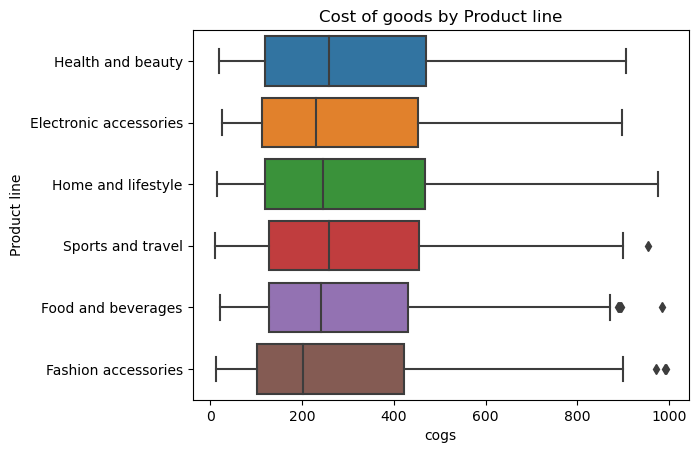

In [150]:
sns.boxplot(data=supermarket_data, x="cogs", y="Product line")
plt.title('Cost of goods by Product line');

#### Write your insghts here

- There is some outliers in the chart.
- The Home and lifestyle, the fashion accessories, and food and beverages have the same maximum values.

This graph will help the business owner to identify any outliers in the data and also helps them to identify max and min values of each product line.

### Multivariate Visualization 
* Plot two Charts
* Provide each charts with at least two insights 

c:\Users\Maryam\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning:

6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



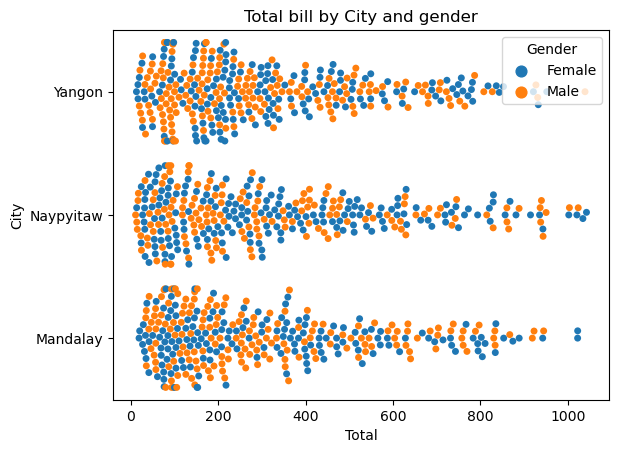

In [151]:
sns.swarmplot(data=supermarket_data, x="Total", y="City", hue="Gender")
plt.title('Total bill by City and gender');

#### Write your insghts here

- All city have almost equal visits of male and female customers.
- There is no outliers in the chart.

This graph will helps the business owner to identify weather they have regular male or femalevistors also in which city.